In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

matplotlib.rcParams["font.size"] = 25
matplotlib.rcParams['figure.figsize'] = [10,10]

In [2]:
train_init = pd.read_csv('train.csv')
test_init = pd.read_csv('test.csv')

In [3]:
train_init.head() #show the first elements of the training sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_init.describe() #Show some relevant parameters of feature distributions

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
mask = train_init.isna().any()
col_nan = train_init.columns[mask] #fhese features contain NaN
print(col_nan)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [6]:
train_init[col_nan].isna().sum() #count the missing value for each feature

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 1. Dataset inspection

First, let us observe the distribution of the target feature, `SalePrice`:

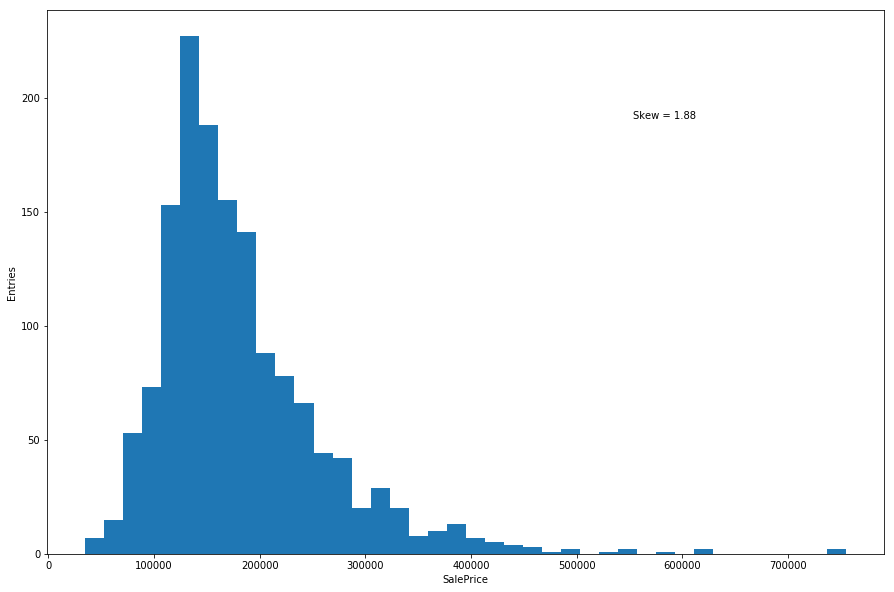

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))

SalePriceSkewness = train_init['SalePrice'].skew()
plt.hist(train_init['SalePrice'], bins=40)
plt.text(0.7, 0.8, 'Skew = {:.2f}'.format(SalePriceSkewness), transform=ax.transAxes)
plt.xlabel('SalePrice')
plt.ylabel('Entries')

plt.show()

The distribution is smooth but asymmetric, peaking at ~150

Let us investigate which variables might be the most correlated with the sale price. We start with a heatmap:

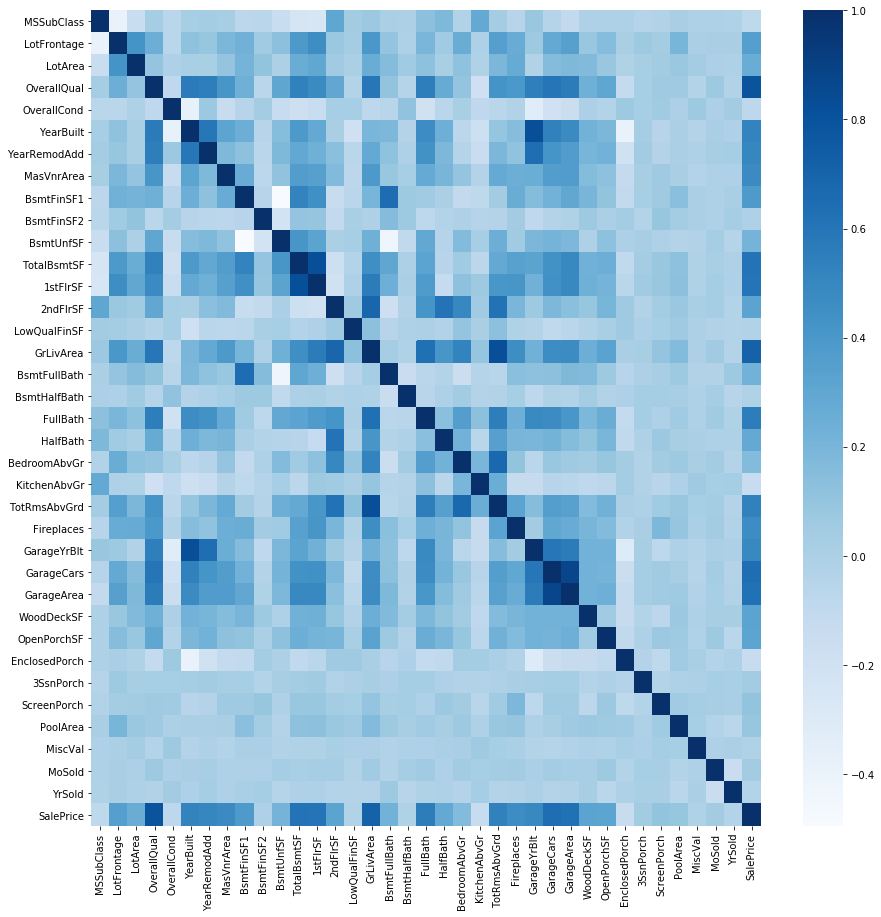

In [8]:
matplotlib.rcParams["font.size"] = 10
plt.figure(figsize= (15 , 15))
sns.heatmap(train_init.drop("Id", axis = 1).corr(),cmap="Blues")

From a first inspection, it seems that `OverallQual`, `GrLivArea`, and `GarageCars` are powerful features. Let us start considering numerical features, and then categorical features

## 1.1 Numerical Features 

In [9]:
#select numerical features
numerical_features = train_init.select_dtypes(include=[np.number]).drop(['SalePrice',  'Id'], axis=1).columns
print('Numerical features (%d):\n %s' %(len(numerical_features), numerical_features))

Numerical features (36):
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


### 1.1.1 Handling missing values

Some features contain NaN values (see above). Let us estimate the NaN values using the `IterativeImputer` provided by `sklearn`

In [10]:
imputer = IterativeImputer()

imputed_train = pd.DataFrame(
    imputer.fit_transform(train_init[numerical_features]),
    columns=list(train_init[numerical_features])
)

imputed_test  = pd.DataFrame(
    imputer.transform(test_init[numerical_features]),
    columns=list(test_init[numerical_features])
)

for var in numerical_features:
    train_init[var] = imputed_train[var]
    test_init[var]  = imputed_test[var]

### 1.1.2 Data Visualization & Correlation Estimation

In [11]:
def make_scatter(varname1, varname2, ax):
    ax.scatter(train_init[varname1], train_init[varname2])
    ax.set_xlabel(varname1)
    ax.set_ylabel(varname2)

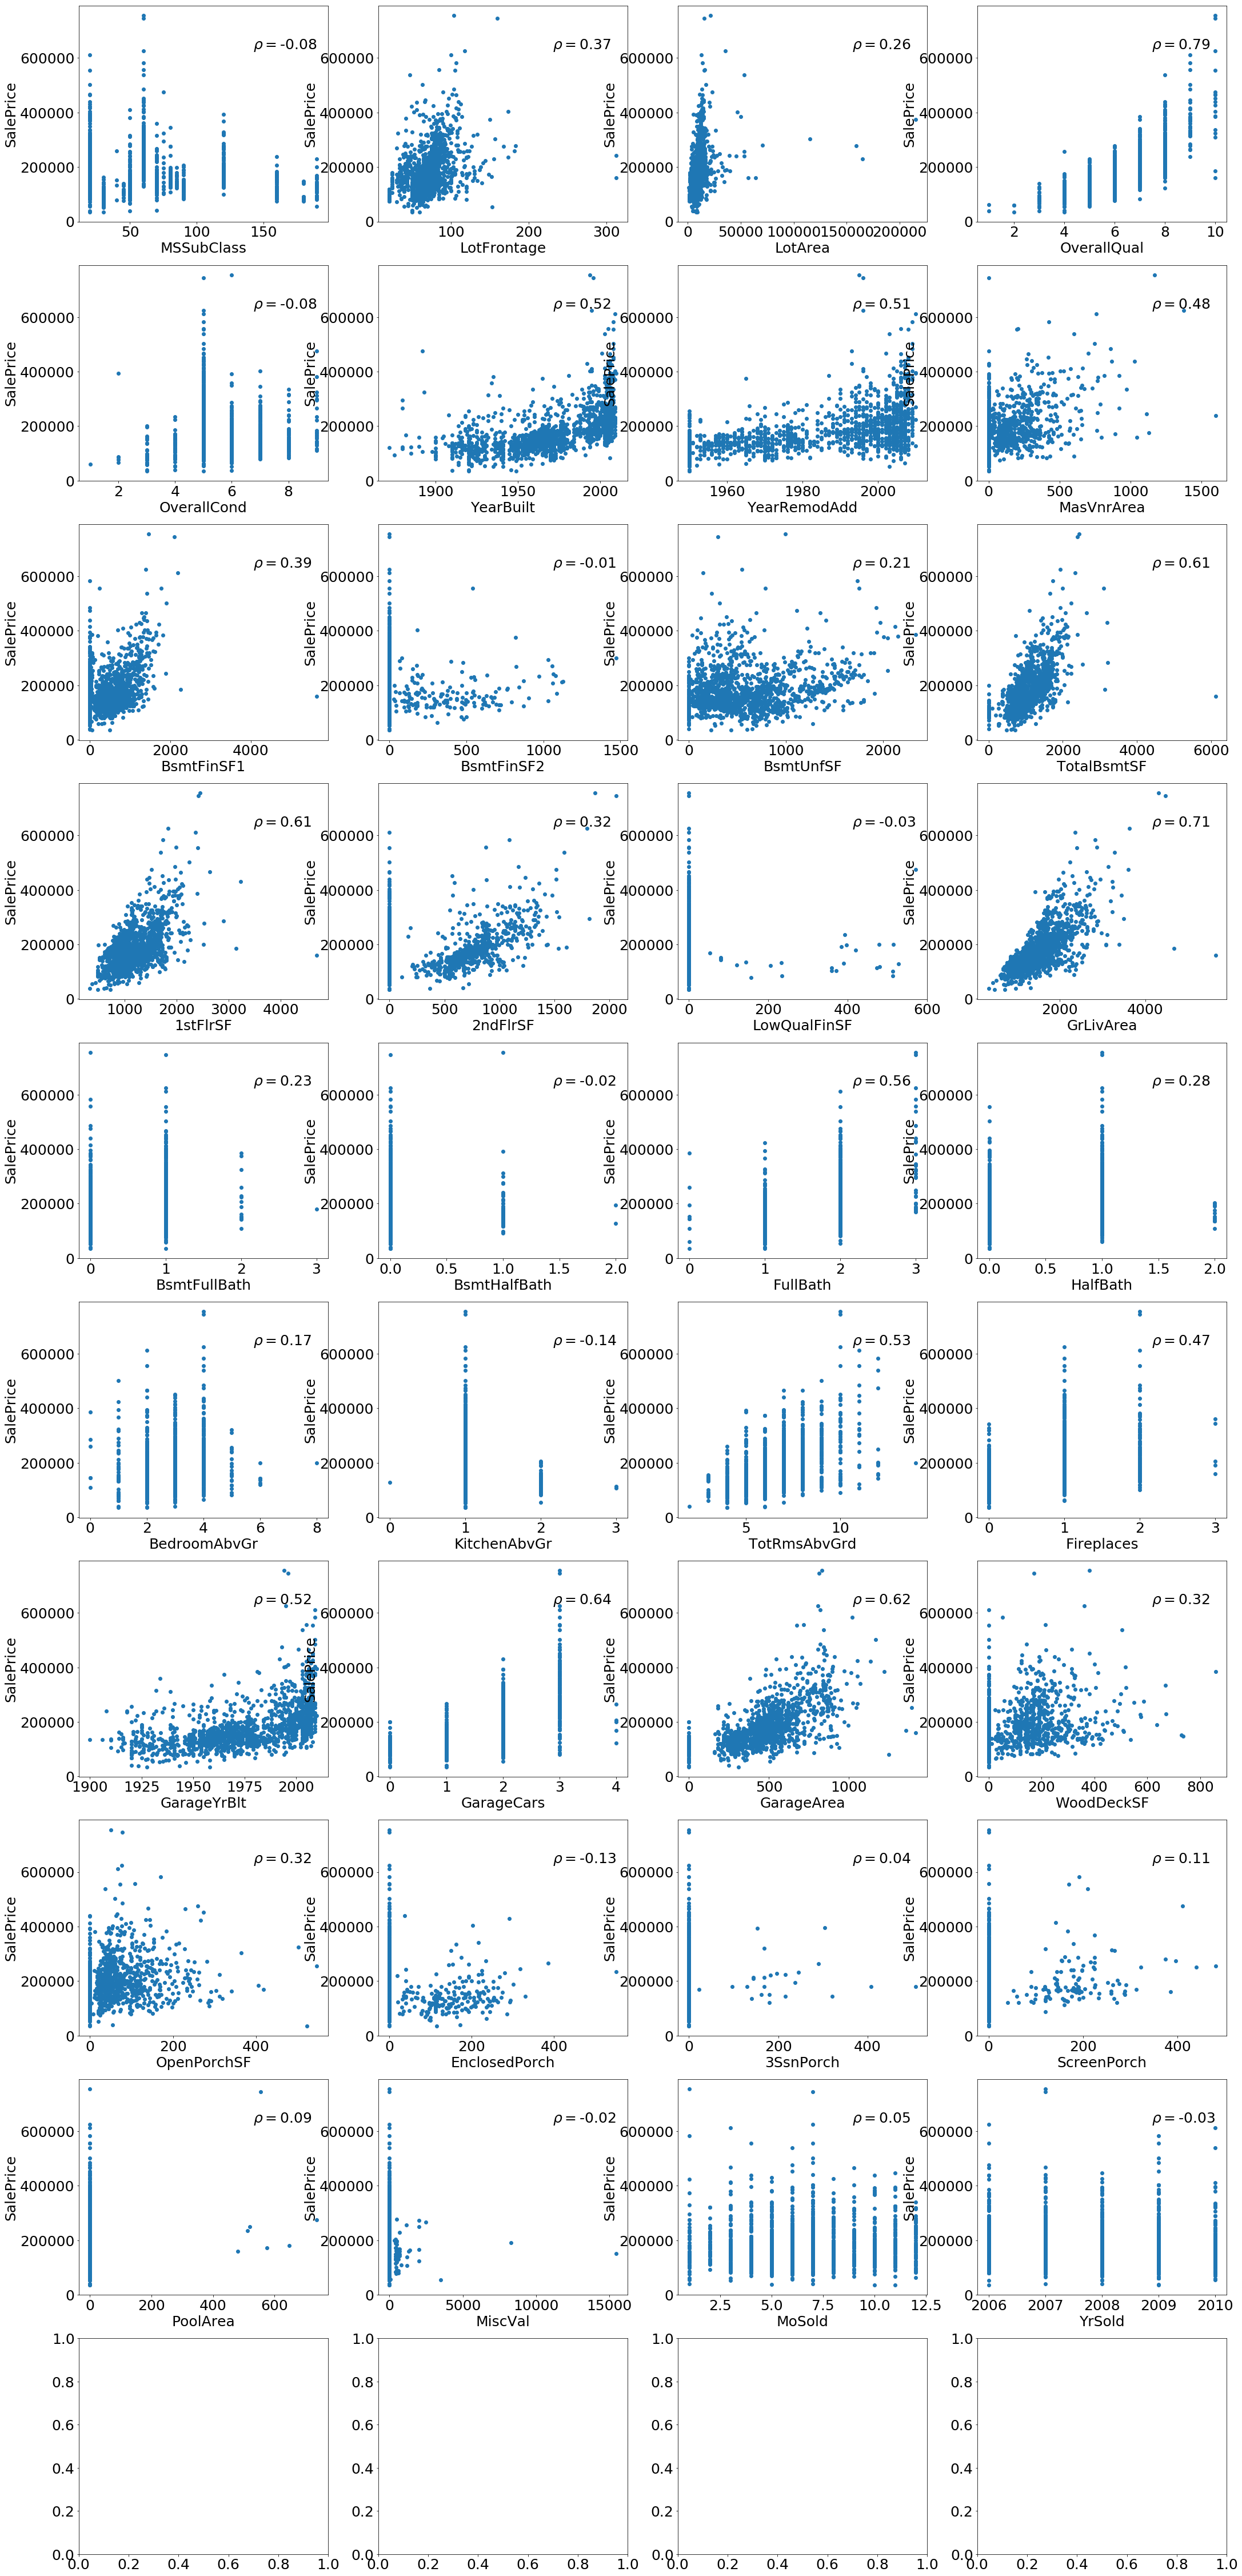

In [12]:
matplotlib.rcParams["font.size"] = 25

rho = []

fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(36, 82))

for ivar, var in enumerate(numerical_features):
    row = int(ivar/4)
    col = ivar%4
    make_scatter(var, 'SalePrice', axs[row, col])
    rho.append(pearsonr(train_init[var], train_init['SalePrice'])[0])
    plt.text(0.7, 0.8, r'$\rho=${:.2f}'.format(rho[-1]), transform=axs[row, col].transAxes)

plt.show()

Some features show a high degree of correlation with the sale price ($\rho>60\%$). Neverthless, some might be cross-correlated, hence not providing much more information than a single feature. Below is the list of real-value features with the corresponding correlation

In [13]:
num_feat = pd.DataFrame({
    'variable': numerical_features,
    'rho': rho
})

num_feat.sort_values(by=['rho'], ascending=False)

,rho,variable
3,0.790982,OverallQual
15,0.708624,GrLivArea
25,0.640409,GarageCars
26,0.623431,GarageArea
11,0.613581,TotalBsmtSF
12,0.605852,1stFlrSF
18,0.560664,FullBath
22,0.533723,TotRmsAbvGrd
5,0.522897,YearBuilt
24,0.518839,GarageYrBlt


Now can check the cross-correlations among the 6 top variables ($\rho>60\%$)

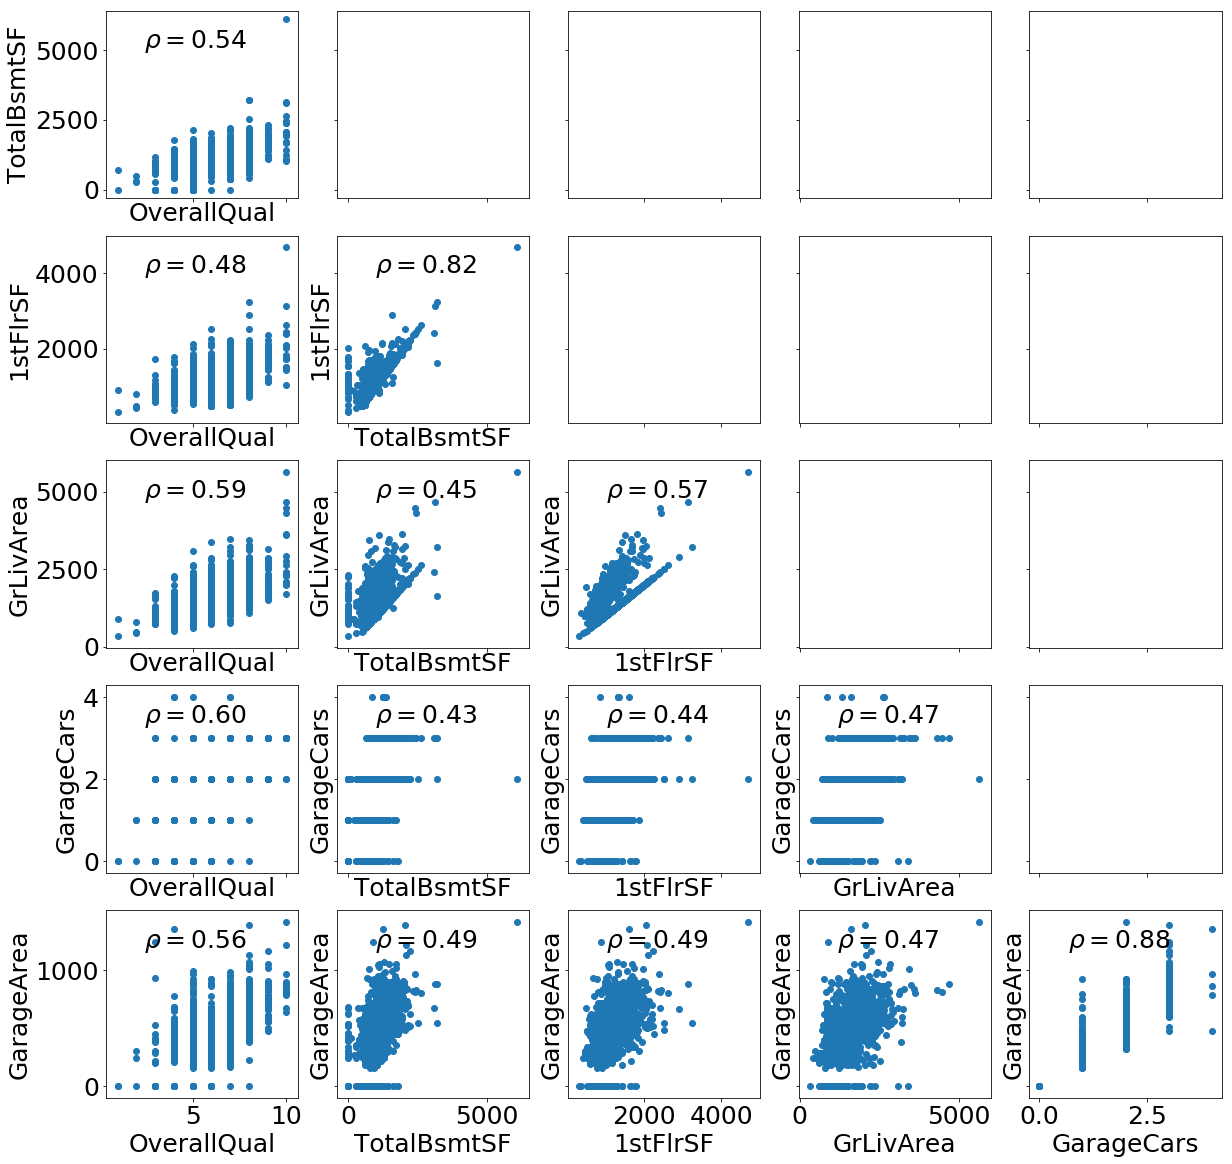

In [14]:
sel_var = num_feat['variable'][num_feat['rho']>0.6]
n=len(sel_var)-1

fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(20, 20), sharex='col', sharey='row')

for i1, var1 in enumerate(sel_var):
    for i2, var2 in enumerate(sel_var):
        if i1>=i2: continue
        row = i2-1
        col = i1
        make_scatter(var1, var2, axs[row, col])
        plt.text(0.2, 0.8, r'$\rho=${:.2f}'.format(pearsonr(train_init[var1], train_init[var2])[0]),
                 transform=axs[row, col].transAxes)

plt.show()

Some of the numerical features are discrete. In the following we investigate more in detail the most powerful discrete features:

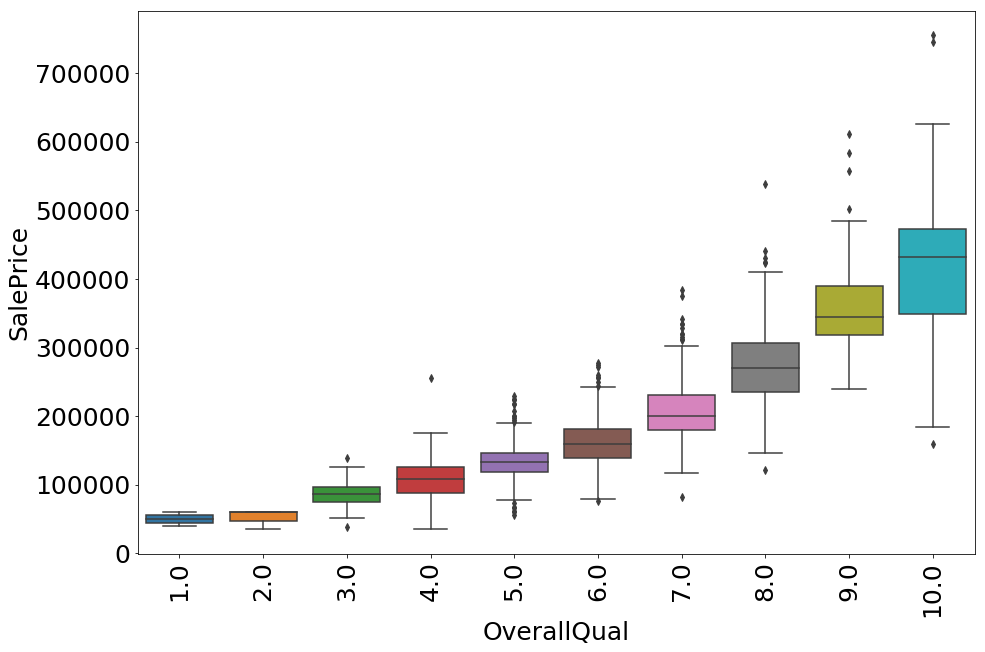

In [15]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='OverallQual', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

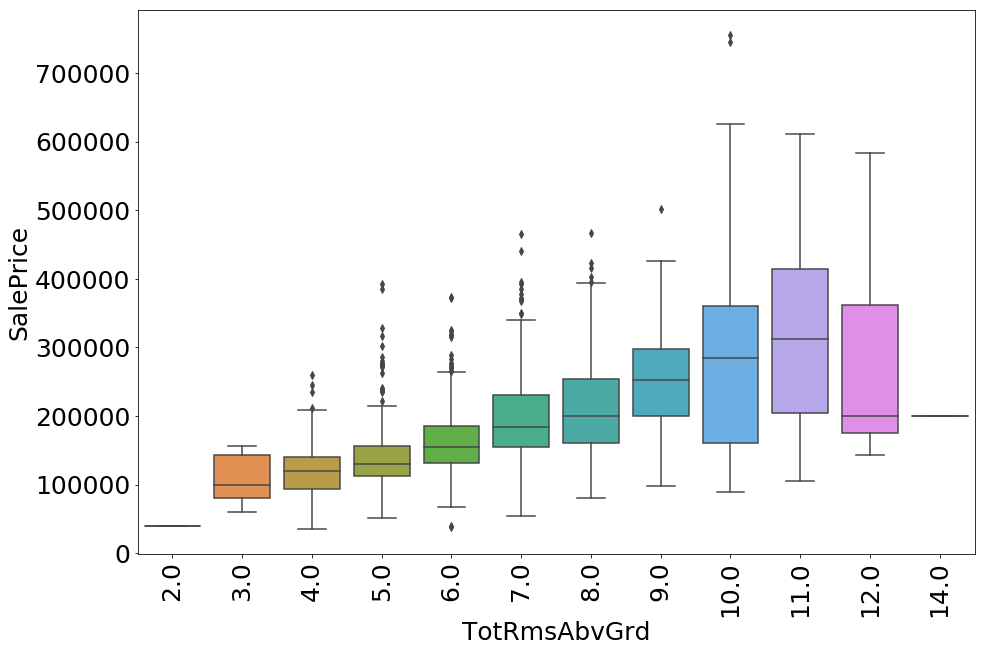

In [16]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

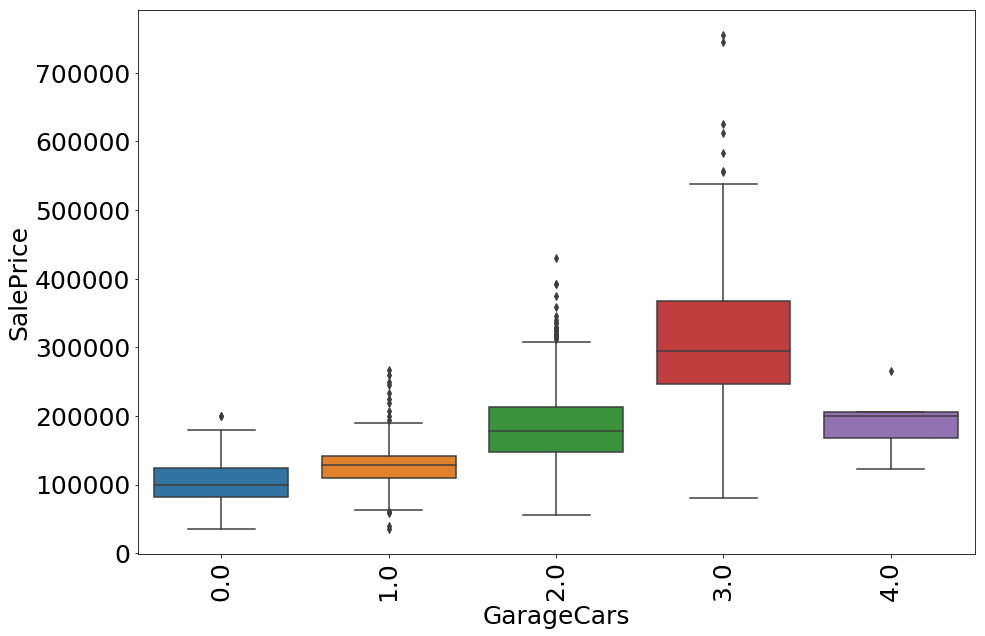

In [17]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='GarageCars', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

## 1.2 Categorical Features

In [18]:
categorical_features = train_init.select_dtypes(include=['object']).columns #select discrete features, type str
print('Categorical features (%d):\n %s' %(len(categorical_features), categorical_features))

Categorical features (43):
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### 1.2.1 Handling Missing Values

Some selected categorical features contain many NaN values:

In [19]:
test_init[categorical_features].isna().sum() #count the missing value for each feature

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In these cases, a NaN value is an indicator of a missing characteristic (e.g. the pool in `PoolQC`). We can therefore set those NaN values to a string None

In [20]:
for var in categorical_features:
    train_init[var].fillna('None', inplace=True)
    test_init[var].fillna('None', inplace=True)

### 1.2.2 Encoding Categorical Features

The values that the categorical features can assume are listed below:

In [21]:
for var in categorical_features:
    print(var)
    print(np.unique(train_init[var]))

MSZoning
['C (all)' 'FV' 'RH' 'RL' 'RM']
Street
['Grvl' 'Pave']
Alley
['Grvl' 'None' 'Pave']
LotShape
['IR1' 'IR2' 'IR3' 'Reg']
LandContour
['Bnk' 'HLS' 'Low' 'Lvl']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
BldgType
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl
['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Exterior1st
['AsbShng' 'AsphS

To encode categorical features, we distinguish between ordinal features and not. For ordinal features, we use the `OrdinalEncoder`, for the rest we use the `LabelEncoder`. Both provided with sklearn

In [22]:
# ORDINAL FEATURES
#as some categories might appear in the test data but not in the train data,
#we need to apply the encoder to the train+test data. We concatenate them
all_data = pd.concat([train_init, test_init], sort=False).reset_index(drop=True)

#we define the encoders
lab_encoder = LabelEncoder()
ord_encoder = OrdinalEncoder(categories=[['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
ord_feature =  ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
            'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC',
            'GarageQual', 'GarageCond']

#We encode the categorical features
for var in categorical_features:
    if var in ord_feature: all_data[var] = ord_encoder.fit_transform(all_data[[var]])
    else: all_data[var] = lab_encoder.fit_transform(all_data[[var]].values.ravel())

In [23]:
#We assign the encoded features to the train and test datasets
for var in categorical_features:
    train_init[var] = all_data[var][:len(train_init)].values
    test_init[var]  = all_data[var][len(train_init):].values

Let us check that the categorical features have been correctly encoded:

In [24]:
for var in categorical_features:
    print(var)
    print(np.unique(test_init[var]))

MSZoning
[0 1 2 3 4 5]
Street
[0 1]
Alley
[0 1 2]
LotShape
[0 1 2 3]
LandContour
[0 1 2 3]
Utilities
[0 2]
LotConfig
[0 1 2 3 4]
LandSlope
[0 1 2]
Neighborhood
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Condition1
[0 1 2 3 4 5 6 7 8]
Condition2
[0 1 2 3 4]
BldgType
[0 1 2 3 4]
HouseStyle
[0 1 2 4 5 6 7]
RoofStyle
[0 1 2 3 4 5]
RoofMatl
[1 5 6 7]
Exterior1st
[ 0  1  2  3  4  5  6  8  9 10 12 13 14 15]
Exterior2nd
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16]
MasVnrType
[0 1 2 3]
ExterQual
[2. 3. 4. 5.]
ExterCond
[1. 2. 3. 4. 5.]
Foundation
[0 1 2 3 4 5]
BsmtQual
[0. 2. 3. 4. 5.]
BsmtCond
[0. 1. 2. 3. 4.]
BsmtExposure
[0 1 2 3 4]
BsmtFinType1
[0 1 2 3 4 5 6]
BsmtFinType2
[0 1 2 3 4 5 6]
Heating
[1 2 3 5]
HeatingQC
[1. 2. 3. 4. 5.]
CentralAir
[0 1]
Electrical
[0 1 2 5]
KitchenQual
[0. 2. 3. 4. 5.]
Functional
[0 1 2 3 4 5 6 7]
FireplaceQu
[0. 1. 2. 3. 4. 5.]
GarageType
[0 1 2 3 4 5 6]
GarageFinish
[0 1 2 3]
GarageQual
[0. 1. 2. 3. 4.]
GarageCond
[0. 1

# 2. Symmetrizing Skewed Data

Let us concatenate all the features in one single list (`SalePrice` is excluded from this list):

In [33]:
all_features = np.concatenate((numerical_features, categorical_features), axis=0)
all_features

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'E

Some features are highly asymmetric. We parametrize the asymmetry through the skewness:

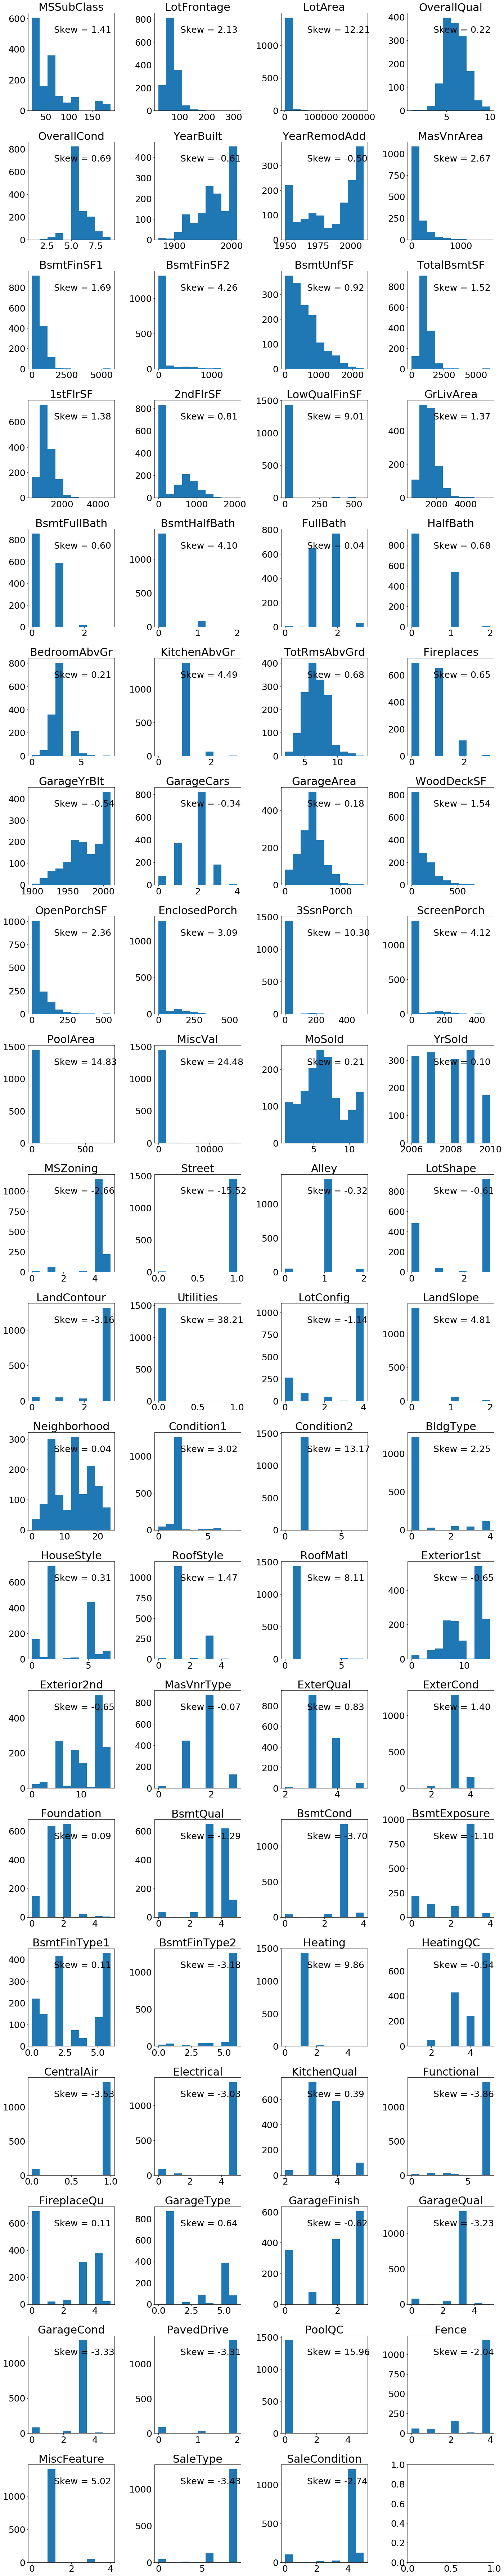

In [26]:
nrows, ncols = 20, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))

skew = []
for ivar, var in enumerate(all_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    axs[row, col].hist(train_init[var])
    axs[row, col].set_title(var)
    skew.append(train_init[var].skew())
    axs[row,col].text(0.3, 0.8, 'Skew = {:.2f}'.format(skew[-1]), transform=axs[row, col].transAxes)
plt.tight_layout()
plt.show()

In [28]:
skewness = pd.DataFrame({
    'feature': all_features,
    'skewness': skew
})
skewness.sort_values(by=['skewness'], ascending=False)

,feature,skewness
41,Utilities,38.209946
33,MiscVal,24.476794
74,PoolQC,15.958567
32,PoolArea,14.828374
46,Condition2,13.171844
...,...,...
77,SaleType,-3.426661
64,CentralAir,-3.530386
58,BsmtCond,-3.701033
67,Functional,-3.857714


Some features are *highly skewed* (skewness>0.7). We symmetrize these features with a log1p function:

In [29]:
skewed_features = skewness['feature'][np.abs(skewness['skewness'])>0.7]

for feat in skewed_features:
    train_init[feat] = np.log1p(train_init[feat])
    test_init[feat]  = np.log1p(test_init[feat])
        
train_init['SalePrice'] = np.log1p(train_init['SalePrice'])

/home/francesco/.local/lib/python3.5/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


We check that the distributions have been symmetrized, and that the test and train dataset are similar

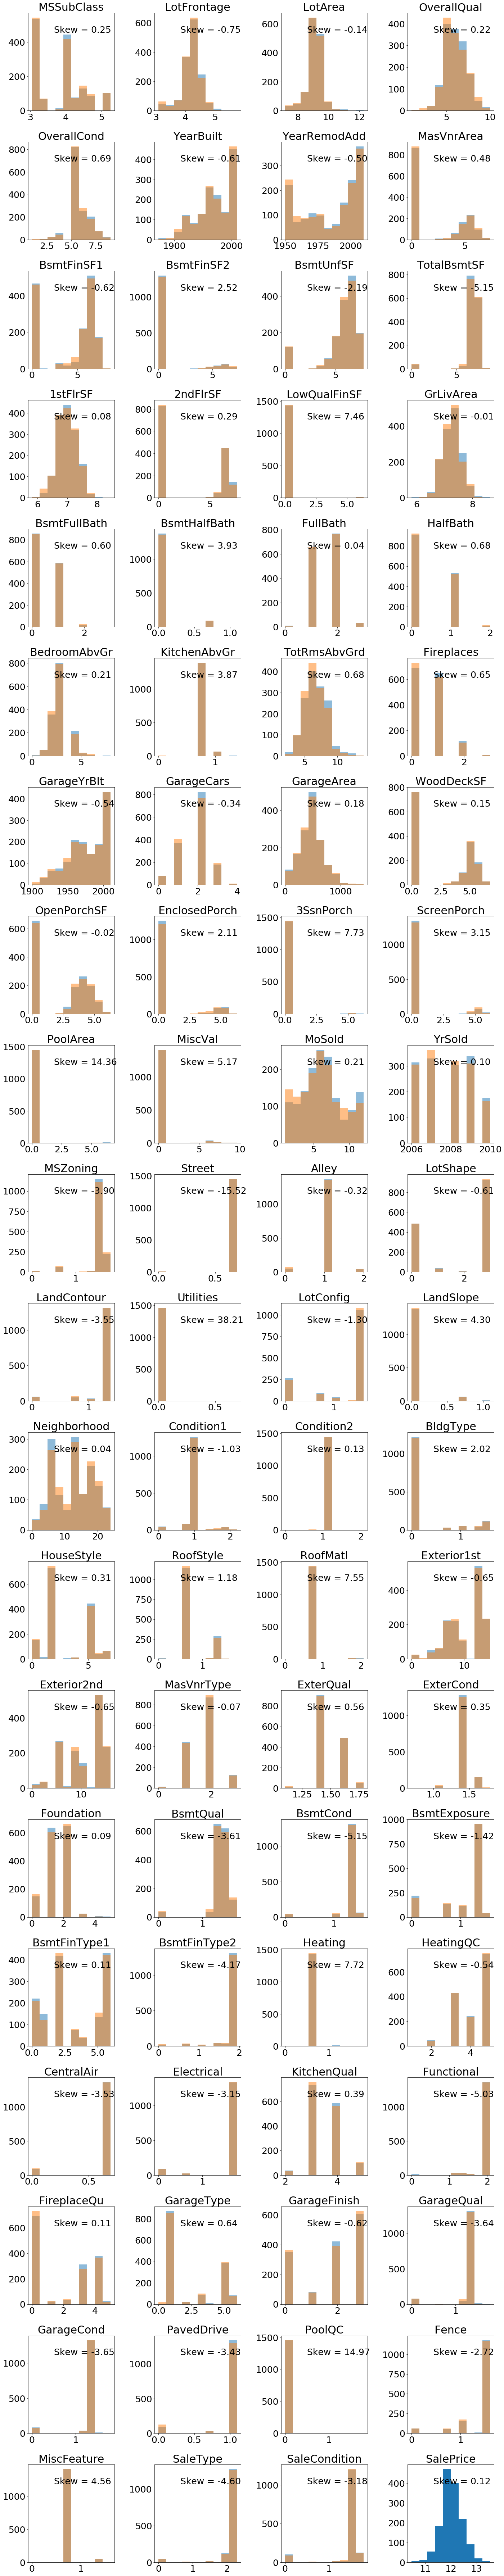

In [36]:
nrows, ncols = 20, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))

skew = []
for ivar, var in enumerate(all_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    h, bins, _ = axs[row, col].hist(train_init[var], alpha=0.5)
    axs[row, col].hist(test_init[var], bins=bins, alpha=0.5)
    axs[row, col].set_title(var)
    skew.append(train_init[var].skew())
    axs[row,col].text(0.3, 0.8, 'Skew = {:.2f}'.format(skew[-1]), transform=axs[row, col].transAxes)

axs[19, 3].hist(train_init['SalePrice'])
axs[19, 3].text(0.3, 0.8, 'Skew = {:.2f}'.format(train_init['SalePrice'].skew()), transform=axs[19, 3].transAxes)
axs[19, 3].set_title('SalePrice')

plt.tight_layout()
plt.show()

# 3 Feature Selection

We empirically found that the following features are optimal for the model training in section 4:

In [43]:
remove_features = ['MasVnrArea', 'Utilities', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch',
                    'MoSold', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'LandContour', 'PavedDrive',
                    '2ndFlrSF', 'BsmtFinType1', 'BsmtFinType2']

sel_features = [feat for feat in all_features if feat not in remove_features]
print('Selected features (%d):\n%s' %(len(sel_feature), sel_feature))

Selected features (65):
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'PoolArea', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Let us plot the ranges of these features

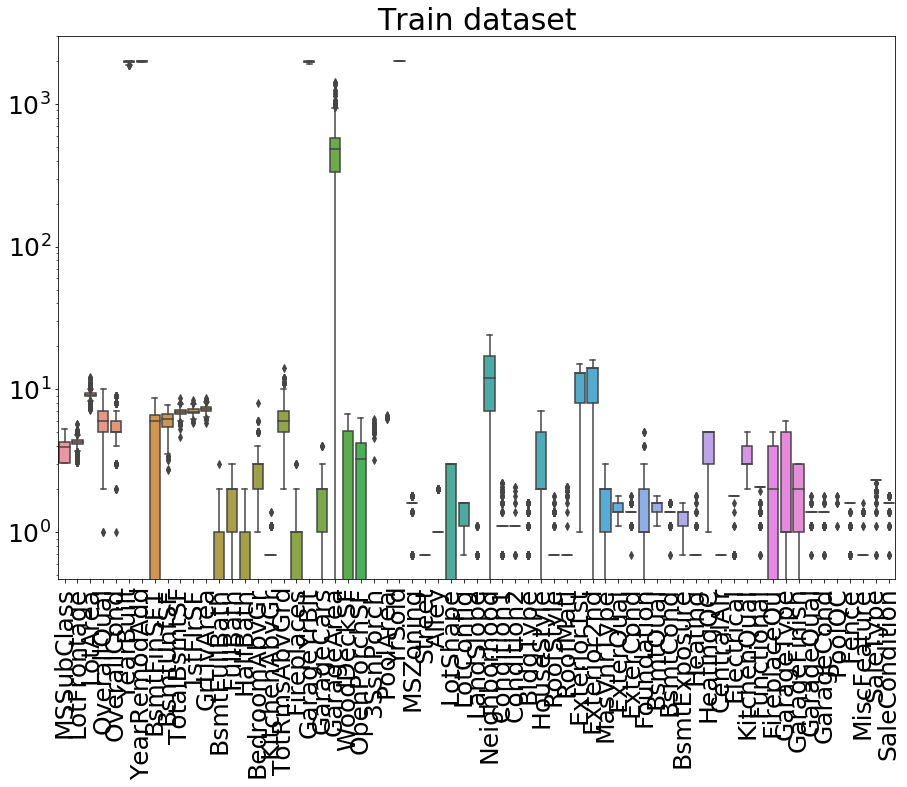

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.boxplot(data=train_init[sel_features])
plt.yscale('log')
plt.xticks(rotation = 90)
plt.title('Train dataset')
plt.show()

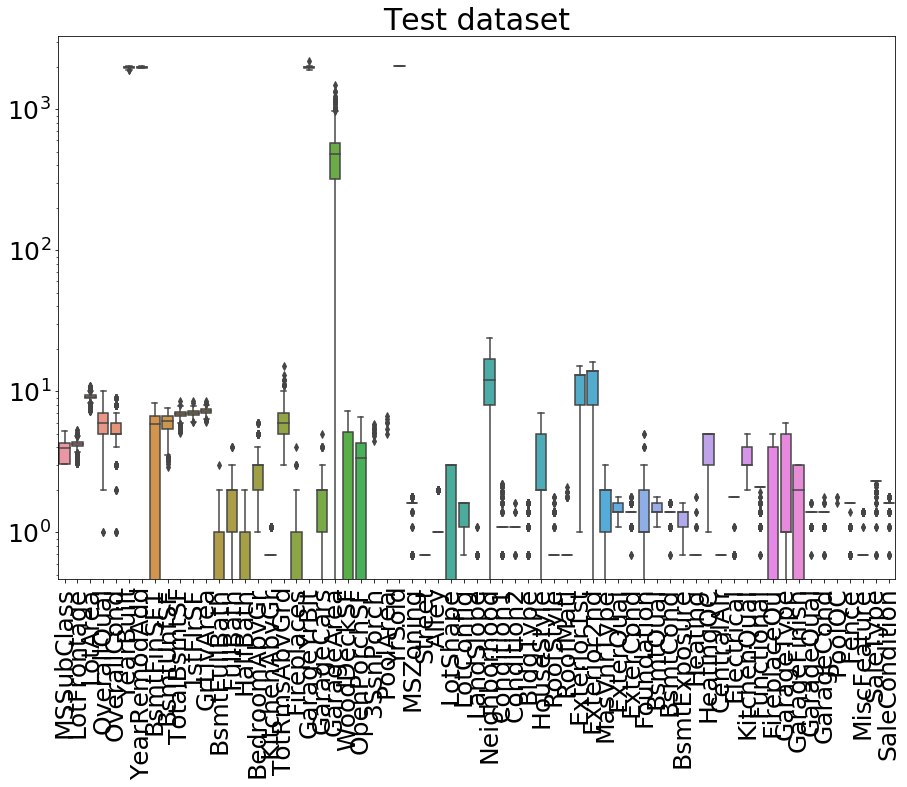

In [45]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.boxplot(data=test_init[sel_features])
plt.yscale('log')
plt.xticks(rotation = 90)
plt.title('Test dataset')
plt.show()

The selected features spans different ranges. Therefore, during the model selection we need to scale them